<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Time_Series_Forecasting%3A_Forecasting_Monthly_Milk_Production_Using_Facebook_Fbprophet_without_Dickey_Fuller_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecasting Timeseries Data Using Facebook FbProphet

1. Installating FbProphet
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance MEtrics
9. Conclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet

In [2]:
df= pd.read_csv('monthly-milk-production-pounds.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
#dropping last row as it is a bad data
df.drop(168,axis=0, inplace=True)

In [6]:
df.columns=['ds','y']

In [7]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


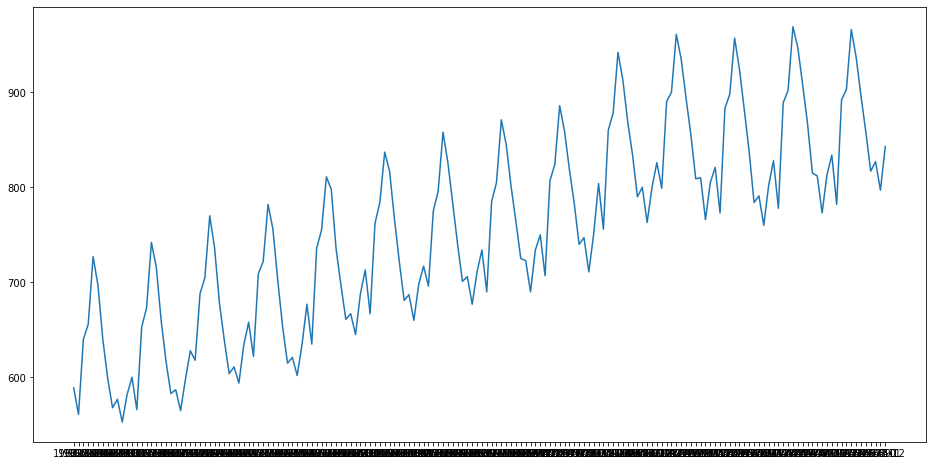

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df['ds'],df['y'])

In [9]:
#converting YYYY-MM formate to YYYY-MM-DD formate
df['ds']= pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


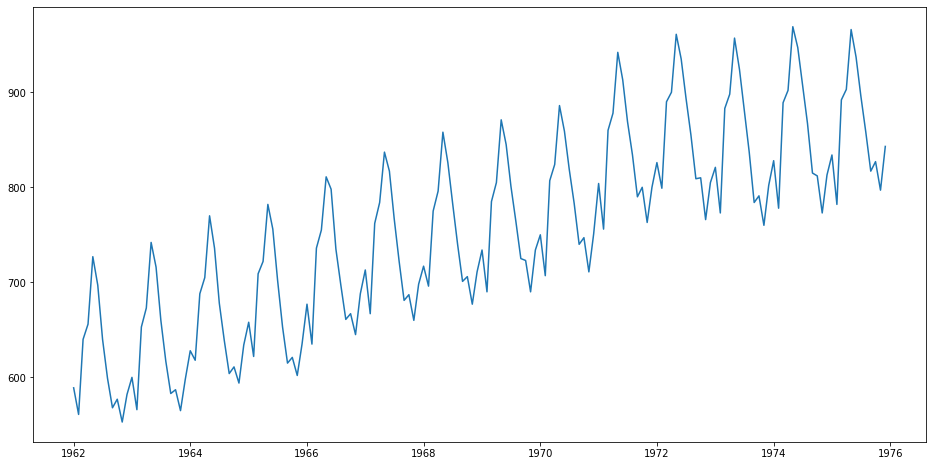

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df['ds'],df['y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14a7297610>]],
      dtype=object)

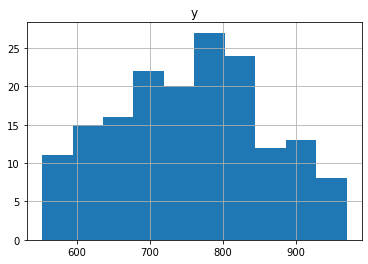

In [12]:
df.hist()

In [13]:
from fbprophet import Prophet

In [14]:
#initializing the Model
model= Prophet()

In [15]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [17]:
#Creating future dates of 365 days
future_dates= model.make_future_dataframe(periods=365)

In [18]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [19]:
#predictions
pred= model.predict(future_dates)

In [20]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,577.438689,596.766433,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,535.821198,555.766532,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,632.171588,651.401275,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.915452,668.668998,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,711.389047,731.283665,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.028496,804.761392,826.681301,870.762194,879.926225,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,0.0,0.0,0.0,815.347638
529,1976-11-27,875.046715,806.850934,830.466067,870.753559,879.960113,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,0.0,0.0,0.0,818.479106
530,1976-11-28,875.064935,811.046763,833.230159,870.752427,879.994000,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,0.0,0.0,0.0,821.790064
531,1976-11-29,875.083154,814.260399,836.045105,870.754257,880.027888,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,0.0,0.0,0.0,825.219679


###Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset. Light Blue color lines indicate trends.

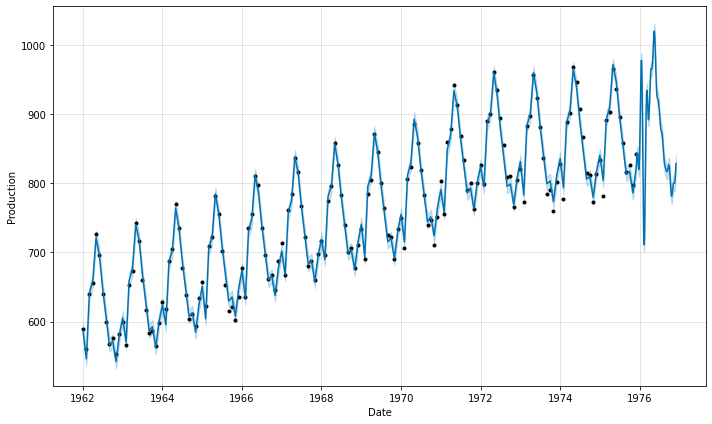

In [21]:
figure1 = model.plot(pred, xlabel='Date', ylabel='Production')

In [22]:
#Visualizing Each Components[Trends,Yearly]

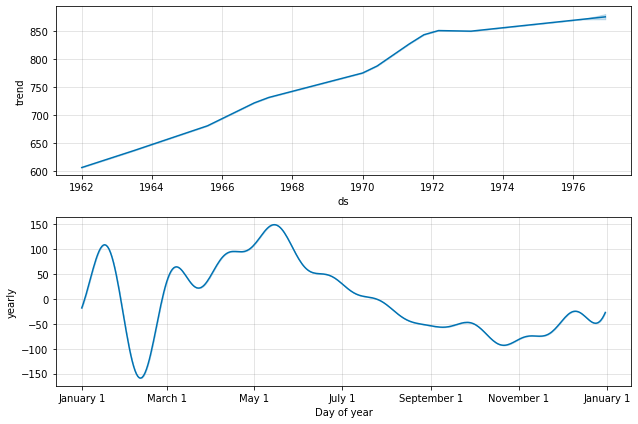

In [23]:
figure2= model.plot_components(fcst=pred)
#fcst=output_value

###Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut-off points in the history of the data and fit the model with data upto that cut-off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [24]:
from fbprophet.diagnostics import cross_validation

In [25]:
df_cv= cross_validation(model, horizon='365 days', period='180 days', initial='1095 days')
#It Computes forecasts from historical cutoff points, which user can input.
#If not provided, begins from (end - horizon) and works backwards, making cutoffs with a spacing of period until initial is reached.

#model: Prophet class object. 
#horizon: string with pd.Timedelta compatible style, e.g., '5 days','3 hours', '10 seconds'. (here, last 365 days i.e. forecasted)
#period: string with pd.Timedelta compatible style. Simulated forecast will be done at every this period. If not provided, 0.5 * horizon is used.(365*0.5= 180)
#initial: string with pd.Timedelta compatible style. The first training period will include at least this much data. If not provided, 3 * horizon is used.(3*365= 1095)

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [26]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,630.734519,628.996470,632.493241,622.0,1965-01-22
1,1965-03-01,715.209269,709.527352,721.314647,709.0,1965-01-22
2,1965-04-01,738.046179,725.836668,750.511266,722.0,1965-01-22
3,1965-05-01,809.508773,790.670177,829.027943,782.0,1965-01-22
4,1965-06-01,778.278652,751.301431,805.817434,756.0,1965-01-22


###Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [27]:
#Obtaining performance metrics
from fbprophet.diagnostics import performance_metrics

In [28]:
df_performance= performance_metrics(df= df_cv)

In [29]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,255.110328,15.972174,12.522709,0.016138,0.014043,0.28
1,41 days,253.085086,15.908648,12.440669,0.016069,0.014043,0.28
2,42 days,267.466632,16.354407,12.890051,0.016696,0.014071,0.28
3,43 days,267.960409,16.369496,13.005926,0.016878,0.014071,0.28
4,46 days,252.637615,15.894578,12.615442,0.016331,0.014071,0.28
...,...,...,...,...,...,...,...
180,357 days,884.015365,29.732396,22.644878,0.028549,0.023298,0.36
181,360 days,690.792073,26.282924,19.536284,0.024325,0.017204,0.40
182,361 days,678.229374,26.042837,19.143664,0.023926,0.013927,0.40
183,362 days,661.483112,25.719314,18.431256,0.023110,0.013880,0.44


In [30]:
from fbprophet.plot import plot_cross_validation_metric

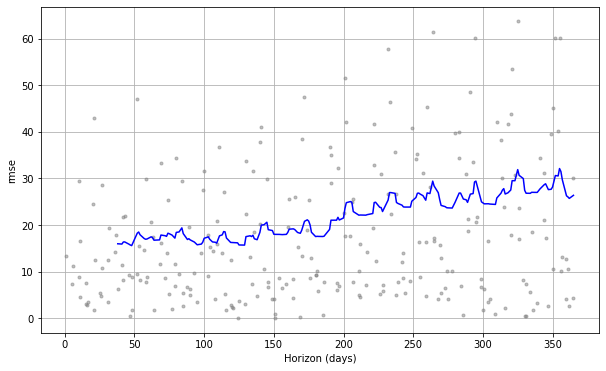

In [31]:
fig= plot_cross_validation_metric(df_cv, metric='rmse')